# Burger's equation

This notebook is meant to explore the numerical solution of Burger's equation $$u_t+uu_x=q.$$ This can also be expressed on flux form as $$u_t+\Big(\frac{u^2}{2}\Big)_x=q$$ with the flux $F(u)=u^2/2$.

As we can easily calculate the derivative $F'(u)=u$ of the flux, we will use the Lax-Wendroff scheme
$$
u_i^{n+1} = u_i^n - \frac{r}{2}\Big(F(u_{i+1}^n)-F(u_{i-1}^n)\Big) + \frac{r^2}{2}\Big(u_{i+1/2}(F(u_{i+1}^n)-F(u_{i}^n) - u_{i-1/2}(F(u_{i}^n)-F(u_{i-1}^n)))\Big),
$$
where $u_{i\pm1/2} = \frac12(u_i^n+u_{i\pm 1}^n)$ and $r=\frac{\Delta t}{\Delta x}$.

The code developed here will be refactored into a more complete program in `burgers_LW.py`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.utils import animate
plt.style.use('ggplot')

In [18]:
cfl = .4
M = 100
xgrid = np.linspace(-1,1,M)
dx = xgrid[1] - xgrid[0]
F = lambda u: u**2/2
q = lambda t,x: .01*np.sin(np.pi*t*x)
init = -np.sin(np.pi*xgrid)
dt = cfl*dx/np.max(np.abs(init))
T = 2
tgrid = np.linspace(0, T, int(T/dt))
dt = tgrid[1] - tgrid[0]

In [19]:
def LW(u_im1, u_i, u_ip1, r):
    F_i = F(u_i)
    F_ip1 = F(u_ip1)
    F_im1 = F(u_im1)
    tmp = u_i - r/2*(F_ip1-F_im1)
    u_iph = (u_i+u_ip1)/2
    u_imh = (u_i+u_im1)/2
    return tmp + r**2/2*(u_iph*(F_ip1-F_i) - u_imh*(F_i-F_im1))

In [22]:
U = np.zeros((len(xgrid), len(tgrid)))
S = np.zeros_like(U)
S[:,0] = q(0, xgrid)
U[:,0] = init
for i in range(len(tgrid)-1):
    r = dt/dx
    U[1:-1,i+1] = LW(U[:-2,i], U[1:-1,i], U[2:,i], r)
    U[0,i+1] = LW(U[-1,i], U[0,i], U[1,i], r)
    U[-1,i+1] = LW(U[-2,i], U[-1,i], U[0,i], r)
    U[:,i+1] += q(tgrid[i], xgrid)
    S[:,i+1] = q(tgrid[i+1], xgrid)


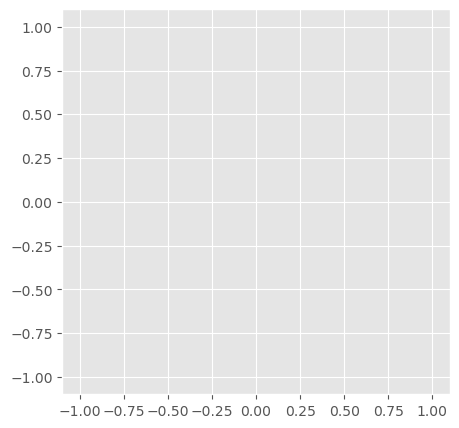

In [21]:
animate('burgers_source_shock_LW.mp4', tgrid, xgrid, U)

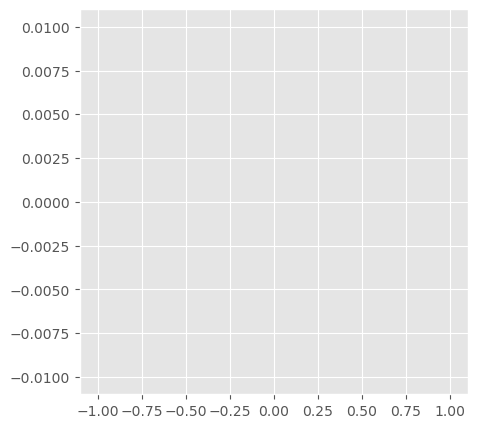

In [23]:
animate('source_func.mp4', tgrid, xgrid, S)